In [54]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.linear_model import LassoCV
data = pd.read_csv("/Users/navyabingi/Downloads/CrimeNGDPNPop_updated.csv")
data = data[['Year', 'Violent','Property','Human Trafficking','Population','Index Crime Total','GDP']]
data

,Year,Violent,Property,Human Trafficking,Population,Index Crime Total,GDP
0,2019,30,232,0,18386.0,262,1390178.0
1,2019,6,36,0,8165.0,42,219526.0
2,2019,39,214,0,11164.0,253,338975.0
3,2019,0,0,0,3038.0,0,73629.0
4,2019,255,935,0,44890.0,1190,1236074.0
...,...,...,...,...,...,...,...
472,2021,428,1581,0,102688.0,2009,5432339.0
473,2021,7,44,0,8746.0,51,128782.0
474,2021,84,155,0,9516.0,239,287370.0
475,2021,14,45,0,8791.0,59,583539.0


In [55]:
# Calculate the IQR of each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
newData = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


# Ridge Regression

/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.13986e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-pac

Best lambda: 972
Best R^2:  0.7044401527453734


/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge 

Text(0.5, 1.0, 'Lambdas vs R^2')

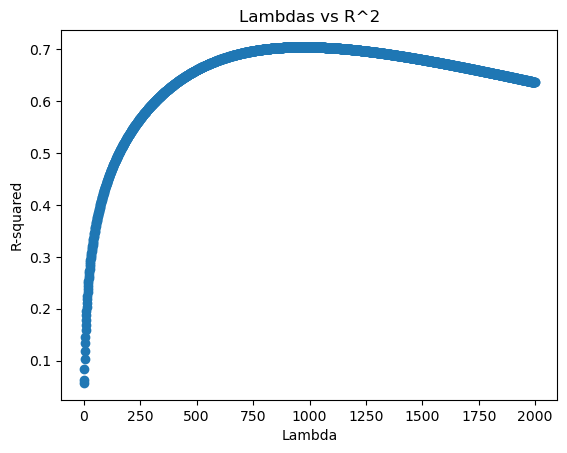

In [56]:
np.random.seed(42)
X = data.iloc[:,0:6]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('GDP', axis=1), data['GDP'], test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#lambdas = np.logspace(1, 5, 100)
lambdas = list(range(0, 2000))
# Create an empty list to store the R-squared values
r_squared_values = []
sse= []
# Loop over the lambdas and compute the R-squared for each one
for lambda_val in lambdas:
    ridge = Ridge(alpha=lambda_val)
    ridge.fit(X_train_scaled, y_train)
    y_pred1 = ridge.predict(X)
    scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
    r_squared_values.append(np.mean(scores))
# Find the index of the maximum R-squared value
best_index = np.argmax(r_squared_values)

# Get the lambda value with the best R-squared
best_lambda = lambdas[best_index]

# Print the lambda value with the best R-squared
print('Best lambda:', best_lambda)
print('Best R^2: ',r_squared_values[best_index])
plt.scatter(lambdas, r_squared_values)
plt.xlabel("Lambda")
plt.ylabel("R-squared")
plt.title("Lambdas vs R^2")

In [57]:


from sklearn.model_selection import KFold
cv1 = KFold(n_splits=5, random_state=1, shuffle=True)


from sklearn.metrics import mean_absolute_error
X = data.iloc[:,0:6]
ridge1 = Ridge(alpha=best_lambda)
ridge1.fit(X_train_scaled, y_train)
print("Cross Validation Scores: Alpha - ",best_lambda)
print(cross_val_score(ridge1, X_train_scaled, y_train, cv=5, scoring='r2'))
y_pred = ridge1.predict(X)
print("Ridge Beta Coefficients:")
ridge1.coef_

Cross Validation Scores: Alpha -  972
[0.90375849 0.24833669 0.70169987 0.85917207 0.80923363]
Ridge Beta Coefficients:


/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([   4834.64619865, 2037320.10092162, 1999031.56009993,
        360098.87017897, 2272530.40640403, 2017197.87287151])

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Forward Feature selection
forwardAuto = sfs(ridge1, k_features=3, forward=True)
sfs1 = forwardAuto.fit(X, Y)
feat_names = list(sfs1.k_feature_names_)
print("Forward Selection: ",feat_names)

# Backward Feature selection
backAuto = sfs(ridge1, k_features=3, forward=False)
sfs2 = backAuto.fit(X, Y)
feat_names2 = list(sfs2.k_feature_names_)
print("Backward Elimination: ",feat_names2)

Forward Selection:  ['Year', 'Human Trafficking', 'Index Crime Total']
Backward Elimination:  ['Year', 'Human Trafficking', 'Index Crime Total']


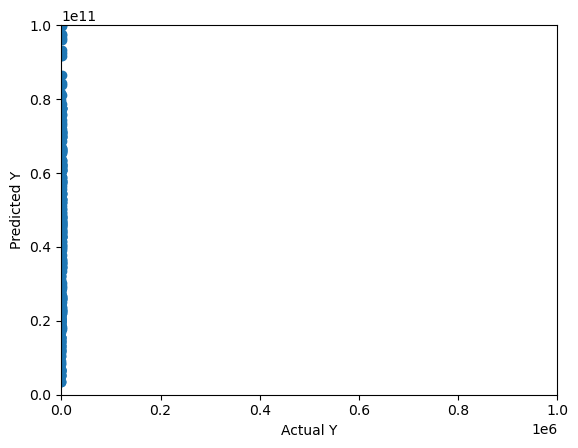

In [59]:
plt.scatter(Y, y_pred)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.xlim([0,1000000])
plt.ylim([0,100000000000])
plt.show()



Text(0, 0.5, 'Predicted Y')

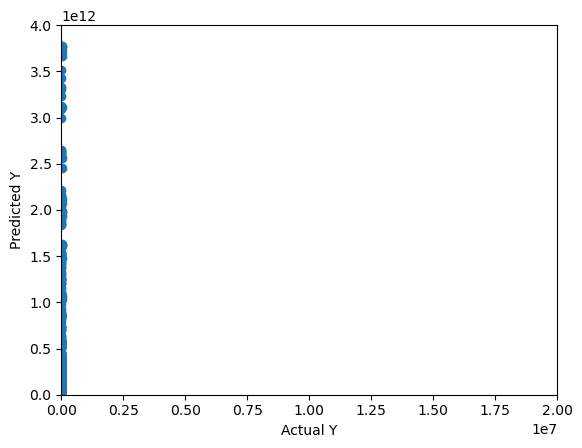

In [60]:
plt.scatter(Y, y_pred2)
plt.xlim([0,20000000])
plt.ylim([0,4000000000000])
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

# Lasso Regression

Best alpha:  257787.01535696533
R2 score for best alpha:  0.8144301167196045
Cross Validation Scores: Alpha -  57
[-0.19139926  0.52760357  0.20592358  0.32821089  0.54442748]


/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Y')

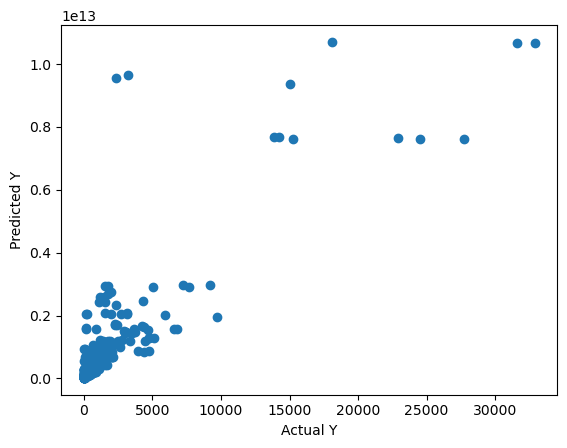

In [61]:
from sklearn.metrics import mean_squared_error
lasso = LassoCV(cv=5).fit(X_train_scaled, y_train)
lasso.coef_
print("Best alpha: ", lasso.alpha_)
print("R2 score for best alpha: ", lasso.score(X_train_scaled, y_train))
best_alpha2 = np.where(lasso.alphas_ == lasso.alpha_)[0][0]

print("Cross Validation Scores: Alpha - ",best_alpha2)
print(cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2'))
#print(lasso.score(X_test_scaled , y_test))
lasso.coef_
pred3 = lasso.predict(X)
sum((Y-pred3)**2)
mean_absolute_error(Y,pred3)
mean_squared_error(Y, pred3, squared=False)
plt.scatter(Y,pred3)
#plt.xlim([0,20000000])
#plt.ylim([0,4000000000000])
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')



In [62]:
# Forward Feature selection
forwardAuto = sfs(lasso, k_features=3, forward=True)
sfs3 = forwardAuto.fit(X, Y)
feat_names2 = list(sfs3.k_feature_names_)
print("Forward Selection: ",feat_names2)

# Backward Feature selection
backAuto = sfs(lasso, k_features=3, forward=False)
sfs4 = backAuto.fit(X, Y)
feat_names3 = list(sfs4.k_feature_names_)
print("Backward Elimination: ",feat_names3)

Forward Selection:  ['Year', 'Violent', 'Index Crime Total']
Backward Elimination:  ['Year', 'Violent', 'Index Crime Total']


Text(0.5, 1.0, 'Population Distribution')

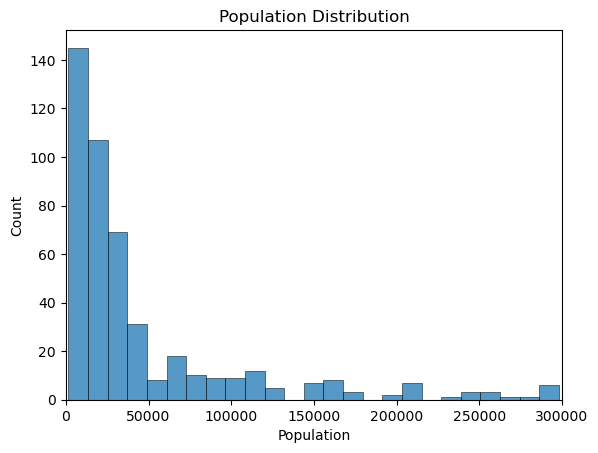

In [63]:
gfg1 = sns.histplot(data=data, x="Population")
gfg1.set_xlim(0, 300000)
gfg1.set_title("Population Distribution")

Text(0.5, 1.0, 'GDP Distribution')

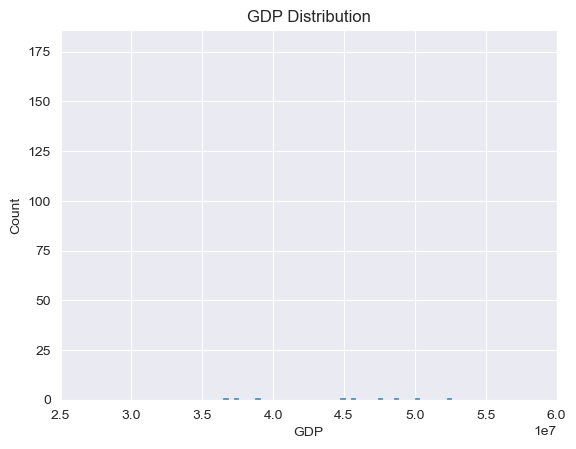

In [64]:
sns.set_style("darkgrid")
gfg1 = sns.histplot(data=data, x="GDP")
gfg1.set_xlim(25000000, 60000000)
gfg1.set_title("GDP Distribution")

Text(0.5, 1.0, 'Total Crime Distribution')

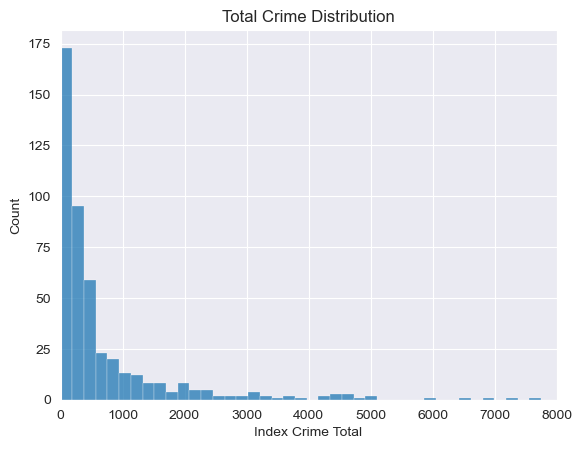

In [65]:
hi = sns.histplot(data=data, x="Index Crime Total")
hi.set_xlim(0, 8000)
hi.set_title("Total Crime Distribution")

In [66]:
data['Index Crime Total'].mean()

1183.4863731656185

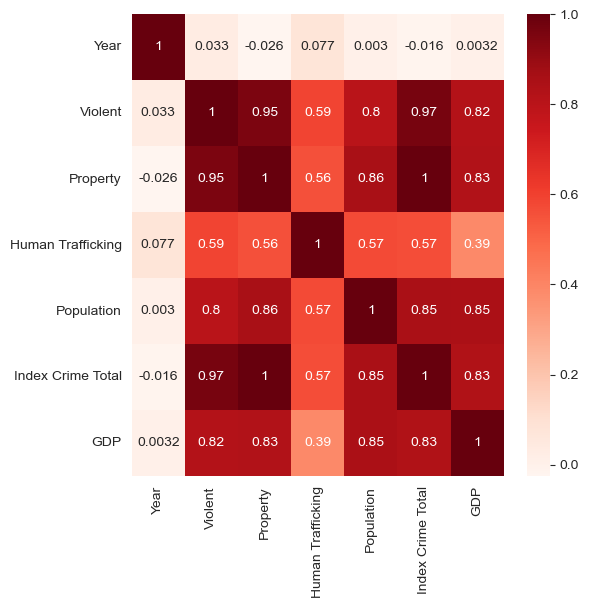

In [67]:
plt.figure(figsize=(6,6))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.777e+15, tolerance: 9.642e+12
  model = cd_fast.enet_coordinate_descent(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+15, tolerance: 9.370e+12
  model = cd_fast.enet_coordinate_descent(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coord

Best lambda: 7126115.430111745
Best R^2:  0.7039798953119523


/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso 

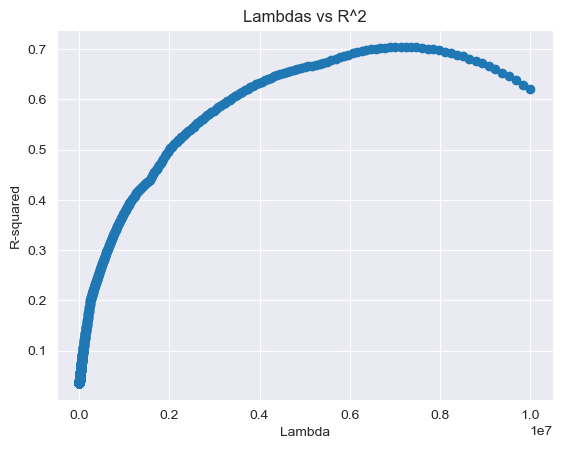

In [68]:
lambdas = np.logspace(0, 7, 1000)
#lambdas = list(range(0, 2000))
# Create an empty list to store the R-squared values
r_squared_values2 = []

# Loop over the lambdas and compute the R-squared for each one
for lambda_val in lambdas:
    las = linear_model.Lasso(alpha=lambda_val)
    las.fit(X_train_scaled, y_train)
    y_pred2 = las.predict(X)
    scores2 = cross_val_score(las, X_train_scaled, y_train, cv=5, scoring='r2')
    r_squared_values2.append(np.mean(scores2))
# Find the index of the maximum R-squared value
best_index2 = np.argmax(r_squared_values2)

# Get the lambda value with the best R-squared
best_lambda2 = lambdas[best_index2]

# Print the lambda value with the best R-squared

plt.xlabel("Lambda")
plt.ylabel("R-squared")
plt.title("Lambdas vs R^2")
print('Best lambda:', best_lambda2)
print('Best R^2: ',r_squared_values2[best_index2])
plt.scatter(lambdas, r_squared_values2)

In [69]:
from sklearn.metrics import r2_score

cv1 = KFold(n_splits=5, random_state=1, shuffle=True)
las = linear_model.Lasso(alpha=257787)
las.fit(X_train_scaled, y_train)
ypredLas = las.predict(X_test)
r2Score = r2_score(Y, y_pred)
print("Model R^2: ",r2Score)
print("Cross Validation Scores: Alpha - ",257787)
print(cross_val_score(las, X_train_scaled , y_train, cv = 5))
print("Lasso Beta Coefficients:")
las.coef_


Model R^2:  -1.2319849323801764e+16
Cross Validation Scores: Alpha -  257787
[-0.09370744  0.51034862  0.17676036  0.38473807  0.04081728]
Lasso Beta Coefficients:


/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([       0.        ,  6321421.69069766,       -0.        ,
       -3311401.64314676,  9985770.86893076,        0.        ])

/Users/navyabingi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot for Lasso model')

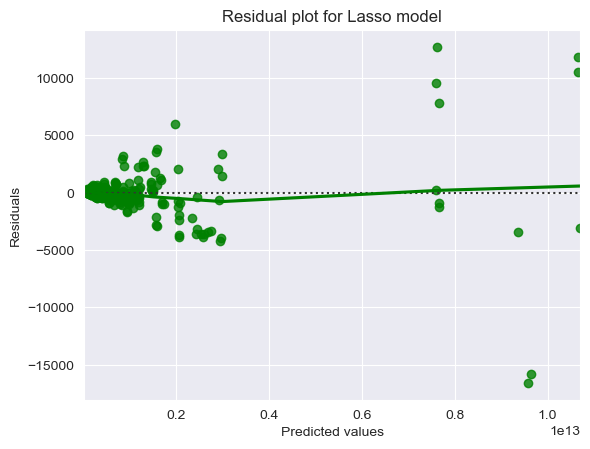

In [70]:
sns.residplot(pred3, Y, lowess=True, color="g")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for Lasso model")

In [71]:
residuals = Y - pred3
max_residual = np.max(residuals)
min_residual = np.min(residuals)

# get the corresponding values from the dataset
max_residual_idx = np.argmax(np.abs(residuals))
min_residual_idx = np.argmin(np.abs(residuals))
max_residual_value = Y[max_residual_idx]
min_residual_value = Y[min_residual_idx]
max_residual_value

18113

In [72]:
data

,Year,Violent,Property,Human Trafficking,Population,Index Crime Total,GDP
0,2019,30,232,0,18386.0,262,1390178.0
1,2019,6,36,0,8165.0,42,219526.0
2,2019,39,214,0,11164.0,253,338975.0
3,2019,0,0,0,3038.0,0,73629.0
4,2019,255,935,0,44890.0,1190,1236074.0
...,...,...,...,...,...,...,...
472,2021,428,1581,0,102688.0,2009,5432339.0
473,2021,7,44,0,8746.0,51,128782.0
474,2021,84,155,0,9516.0,239,287370.0
475,2021,14,45,0,8791.0,59,583539.0


In [74]:
pred3.max()

10701224452408.42